# Mineração de Dados utilizando a metodologia CRISP-DM

## 1. Introdução

### O nome Crisp-DM é uma sigla para o inglês Cross Industry Standard Process for Data Mining, que em português significa algo como “Processo Padrão Inter-Indústrias para Mineração de Dados”. O objetivo dessa metodologia é desenvolver modelos a partir da análise de informações e dados de um negócio para prever futuras falhas e soluções.

### A metodologia Crisp-DM é dividida em seis etapas fundamentais, cada uma com suas particularidades e funcionalidades.

### As três primeiras etapas tem como objetivo a coleta e organização dos dados a serem analisados, envolvendo o entedimento do negócio, dados e a preparação dos dados.

<img src='https://miro.medium.com/v2/resize:fit:988/0*tA5OjppLK627FfFo' width=360>

###  Na imagem acima, é possível ver todas as etapas dessa metodologia, e algo interessante é que ela é um ciclo, então as etapas podem ser revistas e os processos podem ser melhorados mesmo depois de estabelecidos.

## 2. Entendimento do negócio

### Objetivo do projeto:  Analisar uma amostra de dados de usuários do Spotify, que contém informações sobre o que os usuário desse serviço de Streaming escutam em suas playlists, com o objetivo de encontrar associações. Por exemplo, se o usuário assiste a música/artista X, qual a chance dele também ouvir a música/artista Y?  

## 3. Entendimento dos dados

### Os dados serão obtidos através do site AiCrowd, onde é possível baixar o dataset (OBS: Os dados estão sendo disponibilizados devido a um desafio proposto, os dados não podem ser utilizados para fins comerciais, ver mais em https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

### Informações da base de dados fornecidas pelo Spotify

### Genero
 * Male: 45%
 * Female: 54%
 * Unspecified: 0.5%
 * Nonbinary: 0.5%

### Idade
 * 13-17:  10%
 * 18-24:  43%
 * 25-34:  31%
 * 35-44:   9%
 * 45-54:   4%
 * 55+:     3%

### País
 * US: 100%
 
### Estatísticas
 - number of playlists 1000000
 - number of tracks 66346428
 - number of unique tracks 2262292
 - number of unique albums 734684
 - number of unique artists 295860
 - number of unique titles 92944
 - number of playlists with descriptions 18760
 - number of unique normalized titles 17381
 - avg playlist length 66.346428

### Formato dos dados: JSON

### Estrutura dos dados: Os dados são estruturados, possuindo 2 colunas, sendo o título da série/filme e a data que o usuário assistiu

### Demonstração

Cada arquivo é um dicionário JSON com dois campos:
*info* e *playlists*.

### campo `info` 
Contém informações gerais sobre o arquivo:

   * **slice** - the range of slices that in in this particular file - such as 0-999
   * ***version*** -  - the current version of the MPD (which should be v1)
   * ***description*** - a description of the MPD
   * ***license*** - licensing info for the MPD
   * ***generated_on*** - a timestamp indicating when the slice was generated.

### campo `playlists` 
É uma lista que normalmente contém 1000 playlists, cada playlist é um dicionário que contém os seguintes campos:

* ***pid*** - integer - playlist id - the MPD ID of this playlist. This is an integer between 0 and 999,999.
* ***name*** - string - the name of the playlist 
* ***description*** - optional string - if present, the description given to the playlist.  Note that user-provided playlist descrptions are a relatively new feature of Spotify, so most playlists do not have descriptions.
* ***modified_at*** - seconds - timestamp (in seconds since the epoch) when this playlist was last updated. Times are rounded to midnight GMT of the date when the playlist was last updated.
* ***num_artists*** - the total number of unique artists for the tracks in the playlist.
* ***num_albums*** - the number of unique albums for the tracks in the playlist
* ***num_tracks*** - the number of tracks in the playlist
* ***num_followers*** - the number of followers this playlist had at the time the MPD was created. (Note that the follower count does not including the playlist creator)
* ***num_edits*** - the number of separate editing sessions. Tracks added in a two hour window are considered to be added in a single editing session.
* ***duration_ms*** - the total duration of all the tracks in the playlist (in milliseconds)
* ***collaborative*** -  boolean - if true, the playlist is a collaborative playlist. Multiple users may contribute tracks to a collaborative playlist.
* ***tracks*** - an array of information about each track in the playlist. Each element in the array is a dictionary with the following fields:
   * ***track_name*** - the name of the track
   * ***track_uri*** - the Spotify URI of the track
   * ***album_name*** - the name of the track's album
   * ***album_uri*** - the Spotify URI of the album
   * ***artist_name*** - the name of the track's primary artist
   * ***artist_uri*** - the Spotify URI of track's primary artist
   * ***duration_ms*** - the duration of the track in milliseconds
   * ***pos*** - the position of the track in the playlist (zero-based)

Exemplo de uma playlist no JSON:
  
        {
            "name": "musical",
            "collaborative": "false",
            "pid": 5,
            "modified_at": 1493424000,
            "num_albums": 7,
            "num_tracks": 12,
            "num_followers": 1,
            "num_edits": 2,
            "duration_ms": 2657366,
            "num_artists": 6,
            "tracks": [
                {
                    "pos": 0,
                    "artist_name": "Degiheugi",
                    "track_uri": "spotify:track:7vqa3sDmtEaVJ2gcvxtRID",
                    "artist_uri": "spotify:artist:3V2paBXEoZIAhfZRJmo2jL",
                    "track_name": "Finalement",
                    "album_uri": "spotify:album:2KrRMJ9z7Xjoz1Az4O6UML",
                    "duration_ms": 166264,
                    "album_name": "Dancing Chords and Fireflies"
                },
                {
                    "pos": 1,
                    "artist_name": "Degiheugi",
                    "track_uri": "spotify:track:23EOmJivOZ88WJPUbIPjh6",
                    "artist_uri": "spotify:artist:3V2paBXEoZIAhfZRJmo2jL",
                    "track_name": "Betty",
                    "album_uri": "spotify:album:3lUSlvjUoHNA8IkNTqURqd",
                    "duration_ms": 235534,
                    "album_name": "Endless Smile"
                },
                {
                    "pos": 2,
                    "artist_name": "Degiheugi",
                    "track_uri": "spotify:track:1vaffTCJxkyqeJY7zF9a55",
                    "artist_uri": "spotify:artist:3V2paBXEoZIAhfZRJmo2jL",
                    "track_name": "Some Beat in My Head",
                    "album_uri": "spotify:album:2KrRMJ9z7Xjoz1Az4O6UML",
                    "duration_ms": 268050,
                    "album_name": "Dancing Chords and Fireflies"
                },
                // 8 tracks omitted
                {
                    "pos": 11,
                    "artist_name": "Mo' Horizons",
                    "track_uri": "spotify:track:7iwx00eBzeSSSy6xfESyWN",
                    "artist_uri": "spotify:artist:3tuX54dqgS8LsGUvNzgrpP",
                    "track_name": "Fever 99\u00b0",
                    "album_uri": "spotify:album:2Fg1t2tyOSGWkVYHlFfXVf",
                    "duration_ms": 364320,
                    "album_name": "Come Touch The Sun"
                }
            ],

        }


## 4. Preparação dos dados

### Os dados que serão utilizados já estão bem estruturados e documentados, o que diminui os esforços do processo de preparação e tratamento de dados. Porém algumas coisas devem ser feitas:

#### 1. Eliminar nulos e playlists sem músicas
#### 2. Reordernar dados para a estrutura csv, onde cada linha será uma playlist, exemplo: 
ID&emsp;&emsp;&emsp;, Item 1&emsp;&emsp;&emsp;&emsp;&emsp;, Item 2&emsp;&emsp;&emsp;&emsp;&emsp;, Item 3 &emsp;&emsp;&emsp;&emsp;&emsp;, Item 4&emsp;&emsp;&emsp;&emsp;&emsp;... <br>
1048588, artista X/musica Y, artista X/musica Z, artista X/musica Z, artista X/musica Z... <br>
1048589, artista X/musica Z, artista X/musica Z, artista X/musica Z, artista X/musica Z... <br>

### Etapa prática:

### Visualização dos dados coletados:

In [49]:
import pandas as pd
import os
import numpy as np
import json

arquivo = "./spotify_million_playlist_dataset/mpd.slice.0-999.json"
with open(arquivo, 'r') as file:
    data = json.load(file)

# Extrair a primeira playlist
primeira_playlist = data['playlists'][:10]

# Ler os dados diretamente como um DataFrame do pandas
viz = pd.json_normalize(primeira_playlist)

# Visualizar 10 primeiras linhas
viz

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16
5,Wedding,false,5,1430956800,80,71,1,"[{'pos': 0, 'artist_name': 'Cali Swag District...",3,19156557,56
6,I Put A Spell On You,false,6,1477094400,16,15,1,"[{'pos': 0, 'artist_name': 'Creedence Clearwat...",2,3408479,13
7,2017,false,7,1509321600,53,52,1,"[{'pos': 0, 'artist_name': 'Fink', 'track_uri'...",38,12674796,48
8,BOP,false,8,1508976000,46,37,2,"[{'pos': 0, 'artist_name': 'Catfish and the Bo...",21,9948921,23
9,old country,false,9,1501804800,21,20,1,"[{'pos': 0, 'artist_name': 'Willie Nelson', 't...",10,4297488,18


In [57]:
# Concatenar todos os arquivos em um unico JSON
all_playlists = []

# Diretório onde estão os arquivos JSON
diretorio = "./spotify_million_playlist_dataset/"

# Iterar sobre todos os arquivos no diretório
for arq in os.listdir(diretorio):
    if arq.endswith(".json"):
        # Carregar o arquivo JSON
        with open(os.path.join(diretorio, arq), 'r') as f:
            data = json.load(f)
            # Extrair o campo "playlists" e adicionar à lista
            all_playlists.extend(data['playlists'])

# Criar um novo arquivo JSON com todas as playlists
with open('all_playlists.json', 'w') as f:
    json.dump({'playlists': all_playlists}, f)



Todas as playlists foram concatenadas em todas_playlists.json


In [65]:
arquivo = "all_playlists.json"
with open(arquivo, 'r') as file:
    data = json.load(file)

# Extrair as playlists
playlists = data['playlists']

# Ler os dados diretamente como um DataFrame do pandas
dados = pd.json_normalize(playlists)

dados['tracks'] = dados['tracks'].apply(lambda x: [f"{track['artist_name']} / {track['track_name']}" for track in x])
# Visualizar 10 primeiras linhas
dados.tail(10)
# final_data = pd.read_json("all_playlists.json")
# final_data

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
18990,Drake,false,999990,1485820800,11,10,1,"[Drake / One Dance, Drake / Fake Love, Drake /...",7,2552785,7,NaN
18991,Sleep,false,999991,1416268800,39,35,2,[Thirty Seconds To Mars / Where The Streets Ha...,19,9525414,26,NaN
18992,GB,false,999992,1453248000,110,77,1,"[Daddy Yankee / Lovumba, Tito ""El Bambino"" / E...",12,24571468,48,NaN
18993,Studying,false,999993,1406764800,27,19,1,[B.o.B / Airplanes (feat. Hayley Williams of P...,4,5934326,13,NaN
18994,Slow Songs,false,999994,1508544000,65,56,1,"[Miguel / Quickie, Anthony Hamilton / The Poin...",18,16628793,44,NaN
18995,Praise,false,999995,1409529600,32,23,1,"[Unspoken / Who You Are, NEEDTOBREATHE / Somet...",5,8502173,11,NaN
18996,Worship,false,999996,1475625600,122,74,1,[Pax217 / Until The Sun - Pax217 Album Version...,12,31246908,42,NaN
18997,Sex,false,999997,1498176000,24,22,1,"[Romeo Santos / You, Aventura / El Malo, De La...",4,6015165,17,NaN
18998,✝️,false,999998,1506816000,11,8,1,[Hillsong United / Oceans (Where Feet May Fail...,6,2909608,5,NaN
18999,BANDA,false,999999,1433116800,110,57,1,"[Banda Los Recoditos / Mi Último Deseo, Banda ...",13,19451365,26,NaN


In [71]:
eval(dados['tracks'].astype(str))

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [116]:

tracks = []
# dados['tracks'] = dados['tracks'].apply(lambda x: eval(x))

# Iterar sobre o DataFrame
for index, row in dados.iterrows():
    # Adicionar títulos da linha atual à lista de títulos
    tracks.append(row['tracks'])

# Criar um DataFrame com os títulos
new_df = pd.DataFrame(tracks)

# Substituir os valores None por NaN
new_df = new_df.fillna("")

# Renomear colunas
new_df.columns = [f'Track {i}' for i in range(1, len(new_df.columns) + 1)]

# Exibir o novo DataFrame
print(new_df)

# colunas_selecionadas = ['tracks']

# # Criar um novo DataFrame com apenas as colunas selecionadas
# dados_selecionados = dados[colunas_selecionadas]

# # Salvar o novo DataFrame como um arquivo CSV
new_df.to_csv("csv_data.csv", index=False)


                                                 Track 1  \
0                   Robin Schulz / No Fun - Original Mix   
1                           Kanye West / Ultralight Beam   
2      Flo Rida / Low (feat T-Pain) - Feat T-Pain Alb...   
3                              R. Kelly / Feelin' Single   
4             Quimico Ultra Mega / Me Compré un Panamera   
...                                                  ...   
18995                             Unspoken / Who You Are   
18996      Pax217 / Until The Sun - Pax217 Album Version   
18997                                 Romeo Santos / You   
18998     Hillsong United / Oceans (Where Feet May Fail)   
18999              Banda Los Recoditos / Mi Último Deseo   

                                                 Track 2  \
0                     The Weepies / World Spins Madly On   
1             Kanye West / Father Stretch My Hands Pt. 1   
2                                   Lil Wayne / Lollipop   
3                          R. Kelly / W

In [117]:
new_df

,Track 1,Track 2,Track 3,Track 4,Track 5,Track 6,Track 7,Track 8,Track 9,Track 10,...,Track 241,Track 242,Track 243,Track 244,Track 245,Track 246,Track 247,Track 248,Track 249,Track 250
0,Robin Schulz / No Fun - Original Mix,The Weepies / World Spins Madly On,The Paper Kites / Bloom - Bonus Track,Kina Grannis / Dear River,Kina Grannis / Chandelier,Benjamin Francis Leftwich / Shine - Kygo Remix,Jack Johnson / I Got You,Jack Johnson / Banana Pancakes,The Weepies / Gotta Have You,Bear's Den / Bad Blood,...,,,,,,,,,,
1,Kanye West / Ultralight Beam,Kanye West / Father Stretch My Hands Pt. 1,Kanye West / Pt. 2,Kanye West / Famous,Kanye West / Waves,Kanye West / No More Parties In LA,LANY / ILYSB,Coldplay / Yellow,Kanye West / Paranoid,Chance The Rapper / All We Got (feat. Kanye We...,...,,,,,,,,,,
2,Flo Rida / Low (feat T-Pain) - Feat T-Pain Alb...,Lil Wayne / Lollipop,OneRepublic / Apologize,Usher / Love in This Club,Ray J / Sexy Can I,Rihanna / Take A Bow - Main,Coldplay / Viva La Vida,Ne-Yo / Closer,Madonna / 4 Minutes (feat. Justin Timberlake &...,Jesse McCartney / Leavin',...,,,,,,,,,,
3,R. Kelly / Feelin' Single,R. Kelly / When a Woman Loves,R. Kelly / Radio Message,R. Kelly / Number One Hit,R. Kelly / Music Must Be a Lady,The Notorious B.I.G. / #!*@ You Tonight (feat....,Mary J. Blige / It's On,R. Kelly / Touched A Dream,R. Kelly / Whole Lotta Kisses,R. Kelly / Just Like That,...,,,,,,,,,,
4,Quimico Ultra Mega / Me Compré un Panamera,Nicky Jam / Travesuras - Remix,Atomic Otro Way / Te De Campana,Ozuna / El Farsante,Natti Natasha / Criminal,Natti Natasha / Criminal,Wisin / Vacaciones,Sebastian Yatra / Traicionera - Remix,Major Lazer / Buscando Huellas (feat. J Balvin...,Don Omar / Yo Soy De Aqui,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,Unspoken / Who You Are,NEEDTOBREATHE / Something Beautiful,NEEDTOBREATHE / Washed By The Water - Acoustic...,NEEDTOBREATHE / Keep Your Eyes Open,NEEDTOBREATHE / Drive All Night,tobyMac / City On Our Knees,tobyMac / Me Without You,"Phillips, Craig & Dean / Open the Eyes of My H...","Phillips, Craig & Dean / Revelation Song","Phillips, Craig & Dean / When The Stars Burn D...",...,,,,,,,,,,
18996,Pax217 / Until The Sun - Pax217 Album Version,Pax217 / Killjoy Holiday - Pax217 Album Version,Pax217 / Gratitude - Pax217 Album Version,Pax217 / Forevermind - Pax217 Album Version,Pax217 / Shalom - Pax217 Album Version,Pax217 / Free To Be - Pax217 Album Version,Pax217 / No Place Like Home - Pax217 Album Ver...,Pax217 / Skwid - Pax217 Album Version,Newsboys / Shine Vs Tonight - Smash-Ups Album ...,Pax217 / Prizm - Pax217 Album Version,...,,,,,,,,,,
18997,Romeo Santos / You,Aventura / El Malo,"De La Ghetto / La Ocasion (feat. Arcangel, Ozu...",Romeo Santos / Héroe Favorito,Romeo Santos / Promise,The Weeknd / Earned It (Fifty Shades Of Grey),Jeremih / All The Time,Bruno Mars / Gorilla,Bruno Mars / Our First Time,Aventura / Un Beso,...,,,,,,,,,,
18998,Hillsong United / Oceans (Where Feet May Fail),Bethel Music / No Longer Slaves (Radio Version...,Crowder / Come As You Are,Chris Tomlin / Good Good Father,Chris Tomlin / Home,Chris Tomlin / Waterfall,Chris Tomlin / Waterfall,Chris Tomlin / The Roar,Crowder / Lift Your Head Weary Sinner (Chains),Chris Tomlin / We Fall Down,...,,,,,,,,,,


In [118]:
registros = []

# Explicação: para o modelo ler os dados, é preciso mudar a estrutura dos dados de DataFrame para uma matriz.
# Sendo assim, esse loop irá mapear cada linha e coluna para fazer essa transformação

num_colunas = 250
for linha in range(0, len(new_df)):
    registro_linha = []
    for coluna in range(0, num_colunas):
        registro_linha.append(new_df.iloc[linha, coluna])
    registros.append(registro_linha)

    
    
# # Exibir os registros
# for registro in registros:
#     print(registro)



In [119]:
with open('matrix.txt', 'w') as arquivo:
    json.dump(registros, arquivo)



In [120]:
# Ler a lista de volta do arquivo JSON
with open('matrix.txt', 'r') as arquivo:
    matriz = json.load(arquivo)

In [121]:
matriz[3][4]

'R. Kelly / Music Must Be a Lady'

In [128]:
from apyori import apriori
arules = apriori(matriz,min_support=0.0122, min_confidence=0.20,min_lift=2)
association_results = list(arules)
len(association_results)

166

In [201]:
results = []
conjuntos_filtrados = [conjunto for conjunto in association_results if '' not in conjunto]

for item in conjuntos_filtrados:
    
    pair = item[0]
    items = [x for x in pair]
    
    if items[0] != '' and  items[1] != '' and items[0] != items[1]:
        value6 = items[0]+" & "+items[1]
        value0 = items[0]
        value1 = items[1]
    
    value2 = item[1]
    
    value3 = item[2][0][2]
    value4 = item[2][0][3]
    
    rows = (value6,value0,value1,value2,value3,value4)
    results.append(rows)
    
labels = ["Associação","Musica 1","Musica 2", "Support", "Confidence","Lift"]

music_suggestion = pd.DataFrame.from_records(results,columns=labels)

In [202]:
music_suggestion.drop_duplicates(subset=['Musica 1', 'Musica 2'], inplace=True)

In [203]:
music_suggestion.sort_values(by='Lift',ascending=False)[:100]

,Associação,Musica 1,Musica 2,Support,Confidence,Lift
62,Lil Uzi Vert / You Was Right & Lil Uzi Vert / ...,Lil Uzi Vert / You Was Right,Lil Uzi Vert / Money Longer,0.012421,0.563246,25.974929
75,Migos / Slippery (feat. Gucci Mane) & Migos / ...,Migos / Slippery (feat. Gucci Mane),Migos / T-Shirt,0.013421,0.539112,21.840360
4,A Boogie Wit da Hoodie / Drowning (feat. Kodak...,A Boogie Wit da Hoodie / Drowning (feat. Kodak...,Lil Uzi Vert / XO TOUR Llif3,0.013421,0.658915,18.797868
39,Future / Mask Off & Kodak Black / Tunnel Vision,Future / Mask Off,Kodak Black / Tunnel Vision,0.014421,0.428795,18.064534
60,Kodak Black / Tunnel Vision & Lil Uzi Vert / X...,Kodak Black / Tunnel Vision,Lil Uzi Vert / XO TOUR Llif3,0.014789,0.623060,17.774981
...,...,...,...,...,...,...
26,KYLE / iSpy (feat. Lil Yachty) & DRAM / Brocco...,KYLE / iSpy (feat. Lil Yachty),DRAM / Broccoli (feat. Lil Yachty),0.013263,0.326003,9.082184
13,Big Sean / Bounce Back & DRAM / Broccoli (feat...,Big Sean / Bounce Back,DRAM / Broccoli (feat. Lil Yachty),0.012842,0.354136,8.704518
9,Kendrick Lamar / HUMBLE. & Aminé / Caroline,Kendrick Lamar / HUMBLE.,Aminé / Caroline,0.013421,0.363248,7.601002
25,Drake / One Dance & DRAM / Broccoli (feat. Lil...,Drake / One Dance,DRAM / Broccoli (feat. Lil Yachty),0.012474,0.306598,7.263536


In [212]:
import plotly.express as px


df = music_suggestion.sort_values(by='Lift',ascending=False)[:20]

fig = px.scatter_3d(df, x='Support', y='Confidence', z='Lift',hover_name='Associação',color='Lift',color_continuous_scale='hot')

fig.show()

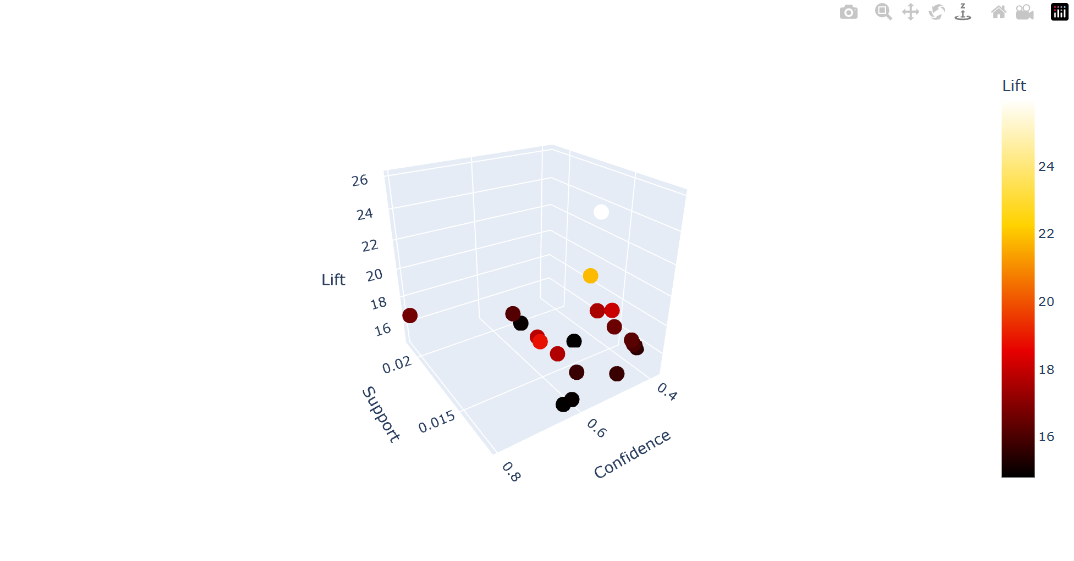